In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px

##Data Cleaning and Pre-processing


In [3]:
#Common Functions

def plotChart(dataset, CTarget_0_1, IndepFeature):
    plt.style.use('dark_background')
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.distplot(dataset[dataset[CTarget_0_1]==0][IndepFeature],label='Not Suffered By Lumpy',hist=False,color='green')
    sns.distplot(dataset[dataset[CTarget_0_1]==1][IndepFeature],label="Suffered By Lumpy",hist=False,color='red')
    plt.grid(True)
    plt.legend()
    plt.show()

def plotGraph(dataset, feature):
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.title(f'{feature} Distribution Graph')
    sns.distplot(dataset[feature],color="red")

    plt.subplot(2,2,2)
    plt.title(f'{feature} Histogram Graph',color="red")
    sns.histplot(dataset[feature],color='red',kde=True,bins=10)

    plt.subplot(2,2,3)
    plt.title(f'{feature} BoxPlot')
    sns.boxplot(dataset[feature],color="red")
    plt.show()

In [4]:
df_lumpy = pd.read_csv("/content/mydrive/MyDrive/Notebooks/Lumpy Skin/Lumpy Skin Images Dataset/Lumpy skin disease data.csv")
df_lumpy.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [5]:
df_lumpy.describe()

,x,y,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000,24803.000000
mean,79.221374,46.370056,59.452159,9.107777,23.978048,0.803487,26.271137,-15.794755,-11.227807,-6.681212,3.728230,8.542482,164.769302,4.416119,629.129412,170.306057,0.122526
std,43.338530,19.220555,19.423029,2.988448,11.518315,1.172915,33.630747,17.587685,17.989715,18.540915,4.952353,6.205199,19.679197,2.406231,2279.198775,1127.977653,0.327898
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,45.083150,34.750000,43.800000,6.800000,23.210000,0.000000,5.900000,-30.100000,-25.500000,-20.900000,0.400000,3.000000,152.000000,3.000000,2.513366,0.000000,0.000000
50%,80.750000,48.250000,62.300000,8.300000,31.000000,0.200000,14.700000,-19.100000,-14.200000,-9.700000,1.500000,8.020000,161.000000,4.000000,43.383823,0.000197,0.000000
75%,109.750000,61.750000,75.300000,11.100000,31.000000,1.100000,33.400000,-2.200000,1.400000,4.900000,4.800000,12.710000,176.000000,4.000000,386.124908,0.002094,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


In [6]:
df_lumpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   region               3039 non-null   object 
 3   country              3039 non-null   object 
 4   reportingDate        3039 non-null   object 
 5   cld                  24803 non-null  float64
 6   dtr                  24803 non-null  float64
 7   frs                  24803 non-null  float64
 8   pet                  24803 non-null  float64
 9   pre                  24803 non-null  float64
 10  tmn                  24803 non-null  float64
 11  tmp                  24803 non-null  float64
 12  tmx                  24803 non-null  float64
 13  vap                  24803 non-null  float64
 14  wet                  24803 non-null  float64
 15  elevation            24803 non-null 

In [7]:
df_lumpy.duplicated().sum()

608

In [8]:
df_lumpy = df_lumpy.drop_duplicates()

In [9]:
df_lumpy.shape

(24195, 20)

In [10]:
df_lumpy.isnull().sum()

x                          0
y                          0
region                 21764
country                21764
reportingDate          21764
cld                        0
dtr                        0
frs                        0
pet                        0
pre                        0
tmn                        0
tmp                        0
tmx                        0
vap                        0
wet                        0
elevation                  0
dominant_land_cover        0
X5_Ct_2010_Da              0
X5_Bf_2010_Da              0
lumpy                      0
dtype: int64

In [11]:
df_lumpy.rename(columns={"x":"Longitude" , "y":"Latitude", "cld":"Monthly Cloud Cover", "dtr":"Diurnal Temperature Range", "frs":"Frost Day Frequency", "pet":"Potential EvapoTranspiration", "pre":"Precipitation", "tmn":"Minimum Temperature", "tmp":"Mean Temperature", "tmx":"Maximum Temperature", "vap":"Vapour Pressure", "wet":"Wet Day Frequency"},inplace=True,errors="raise")


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_lumpy.head()

,Longitude,Latitude,region,country,reportingDate,Monthly Cloud Cover,Diurnal Temperature Range,Frost Day Frequency,Potential EvapoTranspiration,Precipitation,Minimum Temperature,Mean Temperature,Maximum Temperature,Vapour Pressure,Wet Day Frequency,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [13]:
z = np.abs(stats.zscore(df_lumpy['Monthly Cloud Cover']))
out=np.where(z>3)[0]
print('Monthly Cloud Cover'+ " " + str(out))
df_lumpy['Monthly Cloud Cover'] = df_lumpy['Monthly Cloud Cover'].drop(out)

Monthly Cloud Cover [18134]


In [14]:
z = np.abs(stats.zscore(df_lumpy['Diurnal Temperature Range']))
out = np.where(z>3)[0]
print('Diurnal Temperature Range'+ " " + str(out))
df_lumpy['Diurnal Temperature Range'] = df_lumpy['Diurnal Temperature Range'].drop(out)

Diurnal Temperature Range [18309 18310 18311 18312 18325 18326 18327 18328 18341 18342 18343 18344
 18358 19872 19906 19907 19908 19910 19911 19912 19913 19914 19941 19942
 19943 19944 19945 19946 19947 19948 19949 19950 19979 19981 20039 20078
 20079 20133 20134 20188 20241 20296 21139 21151 21152 21159 21160 21166
 22524 22525 22526 22569 22570 22571 22572 22613 22614 22615 22616 22617
 22656 22657 22658 22659 22660 22661 22702 22703 22704 22705 22706 22707
 22748 22749 22750 22751 22752 22753 22793 22794 22795 22796 22797 22798
 22799 22840 22841 22842 22843 22844 22889 22890 22891 22892 22939 22940]


In [15]:
z = np.abs(stats.zscore(df_lumpy['Frost Day Frequency']))
out = np.where(z>3)[0]
print('Frost Day Frequency'+ " " + str(out))
df_lumpy['Frost Day Frequency'] = df_lumpy['Frost Day Frequency'].drop(out)

Frost Day Frequency []


In [16]:
z = np.abs(stats.zscore(df_lumpy['Mean Temperature']))
out = np.where(z>3)[0]
print('Mean Temperature'+ " " + str(out))
df_lumpy['Mean Temperature'] = df_lumpy['Mean Temperature'].drop(out)

Mean Temperature []


In [17]:
z = np.abs(stats.zscore(df_lumpy['Minimum Temperature']))
out = np.where(z>3)[0]
print('Minimum Temperature'+ " " + str(out))
df_lumpy['Minimum Temperature'] = df_lumpy['Minimum Temperature'].drop(out)

Minimum Temperature []


In [18]:
z = np.abs(stats.zscore(df_lumpy['Maximum Temperature']))
out = np.where(z>3)[0]
print('Maximum Temperature'+ " " + str(out))
df_lumpy['Maximum Temperature'] = df_lumpy['Maximum Temperature'].drop(out)

Maximum Temperature []


In [19]:
z = np.abs(stats.zscore(df_lumpy['Wet Day Frequency']))
out = np.where(z>3)[0]
print('Wet Day Frequency'+ " " + str(out))
df_lumpy['Wet Day Frequency'] = df_lumpy['Wet Day Frequency'].drop(out)

Wet Day Frequency [23709 23724 23725]


In [20]:
z = np.abs(stats.zscore(df_lumpy['dominant_land_cover']))
out = np.where(z>3)[0]
print('dominant_land_cover'+ " " + str(out))
df_lumpy['dominant_land_cover'] = df_lumpy['dominant_land_cover'].drop(out)

dominant_land_cover []


In [21]:
df_lumpy = df_lumpy.fillna(method='bfill')
df_lumpy.isnull().sum()

Longitude                           0
Latitude                            0
region                          21764
country                         21764
reportingDate                   21764
Monthly Cloud Cover                 0
Diurnal Temperature Range           0
Frost Day Frequency                 0
Potential EvapoTranspiration        0
Precipitation                       0
Minimum Temperature                 0
Mean Temperature                    0
Maximum Temperature                 0
Vapour Pressure                     0
Wet Day Frequency                   0
elevation                           0
dominant_land_cover                 0
X5_Ct_2010_Da                       0
X5_Bf_2010_Da                       0
lumpy                               0
dtype: int64

#Exploratory Data Analysis

##Geolocation based Features - Latitude, Longitude, Country

In [ ]:
geolocation = df_lumpy.loc[df_lumpy['lumpy'] != 0][['Longitude', 'Latitude', 'country']]
geolocation.head()

,Longitude,Latitude,country
0,90.380931,22.437184,Bangladesh
1,87.854975,22.986757,India
2,85.279935,23.610181,India
3,81.564510,43.882221,China
4,81.161057,43.834976,China


In [ ]:
fig = px.scatter_geo(geolocation,lat='Latitude',lon='Longitude')
fig.update_layout(title = 'Lumpy Skin Disease Area', title_x=0.5)
fig.show()

##Meteorological Features

###Univariate Data Analysis

Region

In [ ]:
df_lumpy['region'].value_counts()

Europe    1809
Asia       538
Africa      84
Name: region, dtype: int64

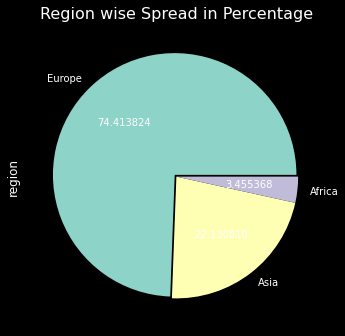

In [ ]:
plt.figure(figsize=(12,40))
plt.subplot(121)
df_lumpy['region'].value_counts().plot.pie(autopct="%2f",explode=(0.02,0,0),title = "Region wise Spread in Percentage")
plt.show()

Country

In [ ]:
pd.DataFrame(df_lumpy.groupby(['region','country'])['country'].count()).rename(columns={'country' : "CountryCount"})

CountryCount
region country                                  
Africa Angola                                  1
       Burundi                                 2
       Djibouti                                1
       Egypt                                  10
       Guinea                                  6
       Namibia                                64
Asia   Armenia                                 1
       Azerbaijan                             16
       Bangladesh                             11
       Bhutan                                  7
       China                                  61
       Cyprus                                  2
       Georgia                                10
       Hong Kong, SAR                          1
       India                                  12
       Iran  (Islamic Republic of)             5
       Iraq                                   23
       Israel                                 66
       Jordan                                  2
       Kazakhstan                              2
       Kuwait                                  3
       Lebanon                                 7
       Myanmar                                 1
       Nepal                                   8
       Russian Federation                      4
       Saudi Arabia                            8
       Sri Lanka                              11
       Syrian Arab Republic                    3
       Turkey                                236
       Viet Nam                               10
       West Bank                              28
Europe Albania                               666
       Bulgaria                              127
       Greece                                220
       Montenegro                             52
       North Macedonia                       174
       Russian Federation                    390
       Serbia                                180

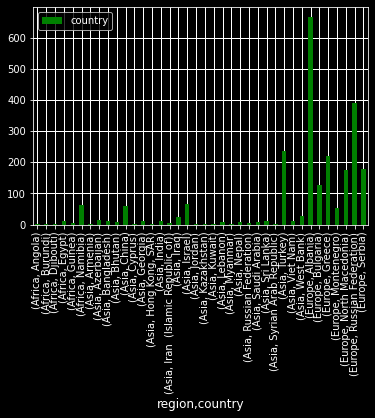

In [ ]:
pd.DataFrame(df_lumpy.groupby(['region','country'])['country'].count()).plot(kind="bar",color="green")

Yearwise and Monthwise Analysis

In [ ]:
df_lumpy['reportingDate'] =pd.to_datetime(df_lumpy['reportingDate'])
df_lumpy['Year'] = df_lumpy['reportingDate'].dt.year
pd.DataFrame(df_lumpy['Year'].value_counts().sort_values(ascending=True)).rename(columns={"Year" : "Case Report Count"})

,Case Report Count
2011.0,6
2021.0,11
2012.0,21
2013.0,81
2020.0,83
2019.0,83
2018.0,94
2015.0,129
2017.0,212
2014.0,275


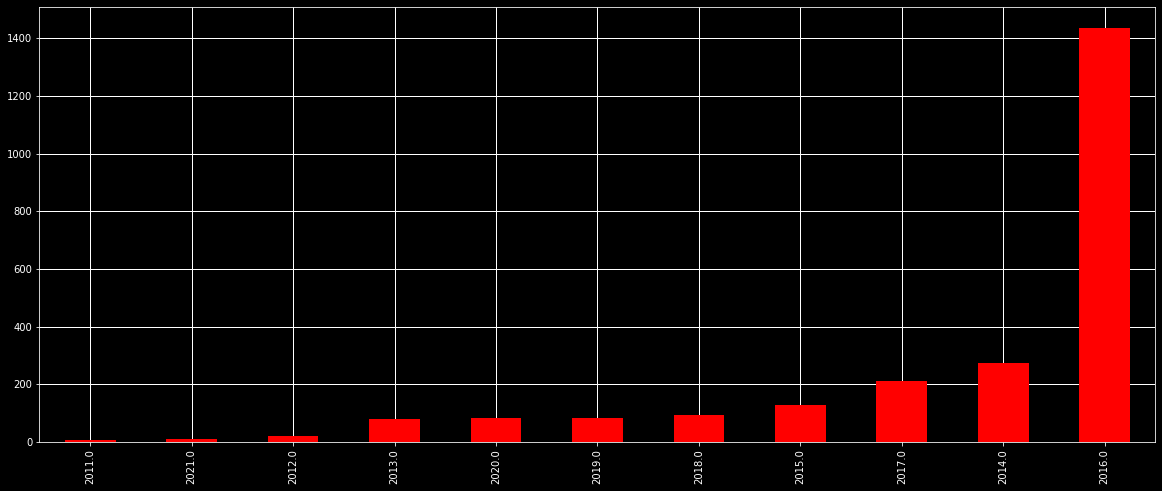

In [ ]:
plt.figure(figsize=(20,8))
df_lumpy[df_lumpy['Year'] == df_lumpy['Year']]['Year'].value_counts().sort_values(ascending=True).plot(kind="bar",color="red")

In [ ]:
df_lumpy['Month'] = df_lumpy['reportingDate'].dt.month
df_lumpy['MonthTitle']= df_lumpy['reportingDate'].dt.month_name()

In [ ]:
pd.DataFrame(df_lumpy.groupby(['Year','Month'])['Month'].count()).rename(columns={'Month':'CaseCounts'})

CaseCounts
Year   Month            
2011.0 7.0             1
       10.0            3
       11.0            2
2012.0 5.0             2
       7.0             2
...                  ...
2020.0 9.0             8
       10.0           13
       11.0            7
       12.0           10
2021.0 1.0            11

[93 rows x 1 columns]

In [ ]:
df_lumpy.pivot_table(index=['Month','MonthTitle'],columns=['Year','region'],values=['lumpy'],aggfunc='count')

lumpy                                                        \
Year             2011.0 2012.0 2013.0       2014.0       2015.0        2016.0   
region           Africa   Asia Africa  Asia Africa  Asia   Asia Europe Africa   
Month MonthTitle                                                                
1.0   January       NaN    NaN    NaN   1.0    NaN  11.0    1.0    NaN    2.0   
2.0   February      NaN    NaN    NaN   3.0    NaN   4.0    NaN    6.0    NaN   
3.0   March         NaN    NaN    NaN  10.0    NaN  10.0    NaN    2.0    NaN   
4.0   April         NaN    NaN    NaN  32.0    NaN  50.0    2.0    8.0    NaN   
5.0   May           NaN    2.0    NaN   5.0    NaN  33.0    1.0    NaN    NaN   
6.0   June          NaN    NaN    NaN   NaN    NaN  31.0    NaN    NaN    NaN   
7.0   July          1.0    2.0    NaN   4.0    NaN  93.0    NaN    NaN    2.0   
8.0   August        NaN    4.0    1.0   NaN    NaN  13.0    1.0   15.0    NaN   
9.0   September     NaN    1.0    NaN   4.0    6.0   NaN    2.0   63.0    2.0   
10.0  October       3.0    3.0    NaN   NaN    NaN  19.0    NaN   28.0    NaN   
11.0  November      2.0    4.0    NaN  16.0    NaN   2.0    NaN    NaN    NaN   
12.0  December      NaN    5.0    4.0   1.0    NaN   3.0    NaN    NaN    NaN   

                       ...                                                 \
Year                   ... 2017.0        2018.0             2019.0          
region           Asia  ...   Asia Europe Africa Asia Europe   Asia Europe   
Month MonthTitle       ...                                                  
1.0   January     1.0  ...    NaN   31.0    NaN  NaN   24.0    NaN    NaN   
2.0   February    2.0  ...    NaN   12.0    NaN  NaN    NaN    NaN    NaN   
3.0   March       NaN  ...    NaN    6.0    NaN  3.0   12.0    1.0    1.0   
4.0   April       NaN  ...    NaN    5.0    NaN  NaN    NaN    5.0    3.0   
5.0   May         NaN  ...    NaN   17.0    NaN  NaN    2.0    NaN    NaN   
6.0   June        NaN  ...    NaN   31.0    NaN  NaN    NaN    2.0    1.0   
7.0   July        6.0  ...    1.0   20.0   10.0  NaN   13.0    8.0    3.0   
8.0   August      2.0  ...    NaN   14.0    NaN  1.0    8.0    4.0    8.0   
9.0   September   NaN  ...    NaN    4.0    NaN  NaN   11.0    8.0    6.0   
10.0  October     NaN  ...    NaN   10.0    NaN  1.0    4.0   21.0    1.0   
11.0  November    NaN  ...    NaN    4.0    NaN  1.0    2.0    3.0    NaN   
12.0  December    NaN  ...    NaN    7.0    NaN  NaN    2.0    2.0    6.0   

                                      
Year             2020.0       2021.0  
region           Africa  Asia   Asia  
Month MonthTitle                      
1.0   January       NaN   NaN   11.0  
2.0   February      NaN   NaN    NaN  
3.0   March         NaN   1.0    NaN  
4.0   April         NaN   1.0    NaN  
5.0   May           NaN   1.0    NaN  
6.0   June          NaN   2.0    NaN  
7.0   July          NaN  13.0    NaN  
8.0   August        NaN  27.0    NaN  
9.0   September     NaN   8.0    NaN  
10.0  October       NaN  13.0    NaN  
11.0  November      1.0   6.0    NaN  
12.0  December      NaN  10.0    NaN  

[12 rows x 22 columns]

Monthly Cloud Cover

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



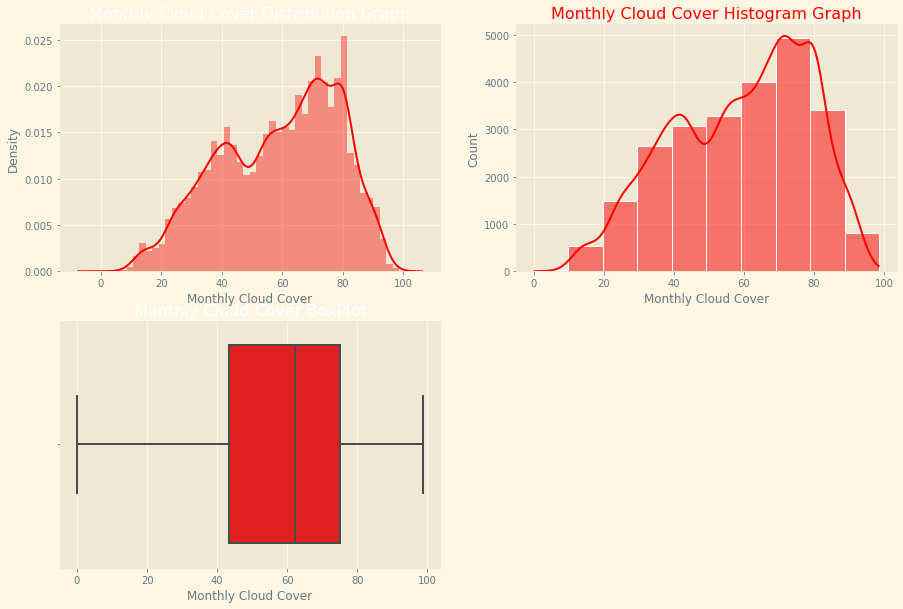

In [ ]:
plotGraph(df_lumpy,'Monthly Cloud Cover')

Diurnal Temperature Range

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



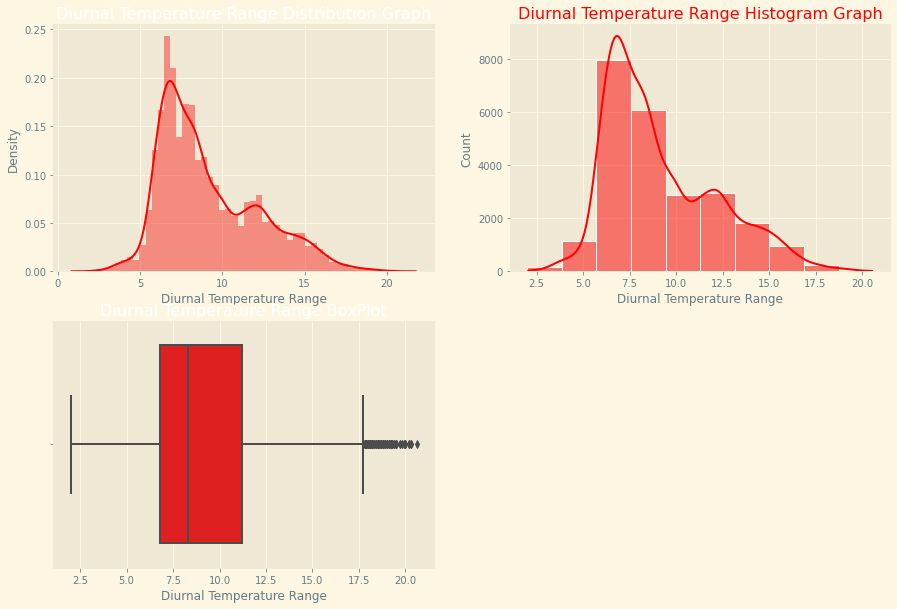

In [ ]:
plotGraph(df_lumpy,'Diurnal Temperature Range')

Frost Day Frequency

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



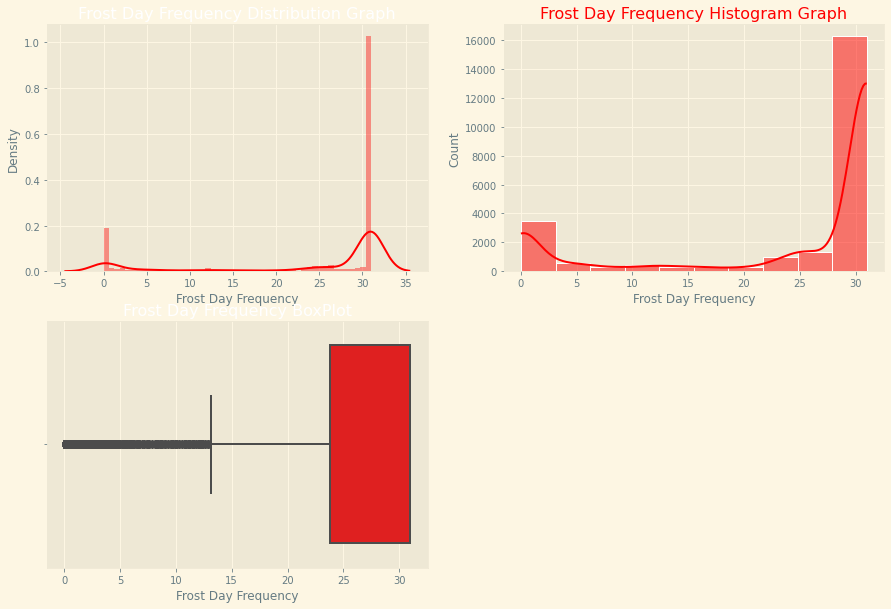

In [ ]:
plotGraph(df_lumpy,'Frost Day Frequency')

Potential EvapoTranspiration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



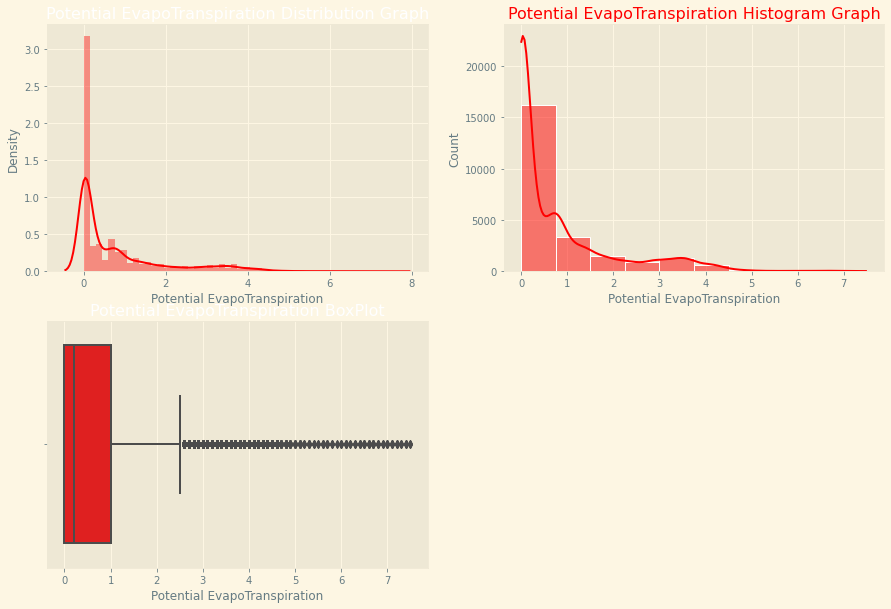

In [ ]:
plotGraph(df_lumpy,'Potential EvapoTranspiration')

Precipitation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



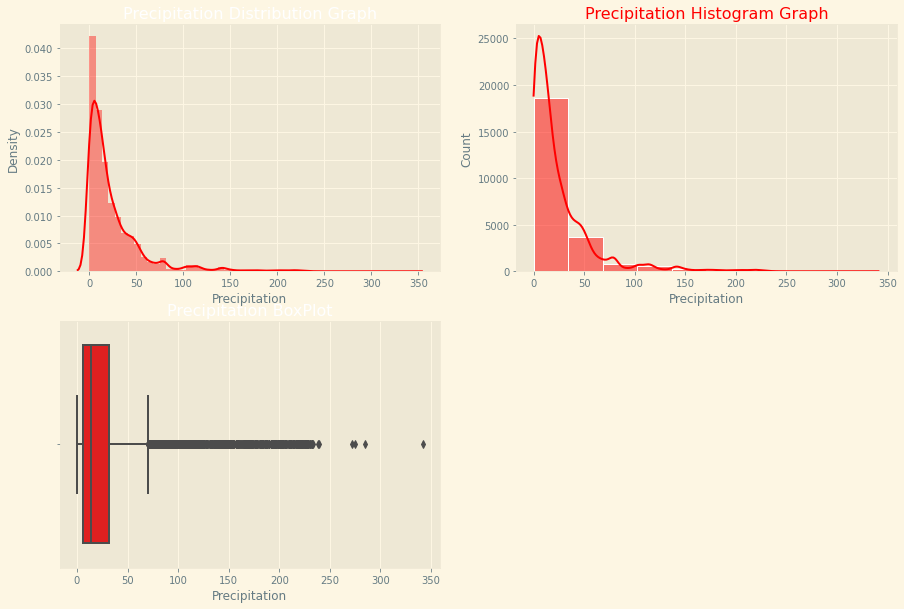

In [ ]:
plotGraph(df_lumpy,'Precipitation')

Mean Temperature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



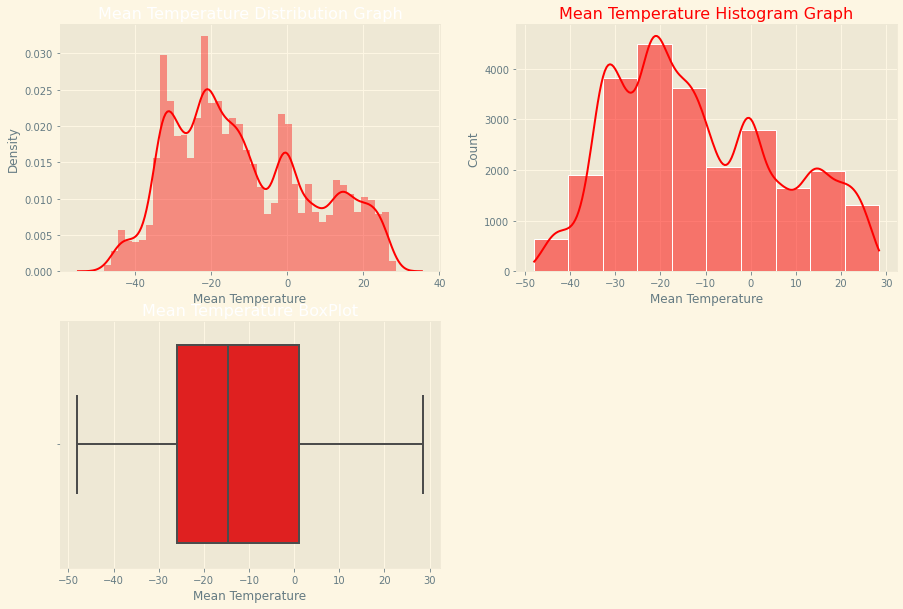

In [ ]:
plotGraph(df_lumpy,'Mean Temperature')

Minimum Temperature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



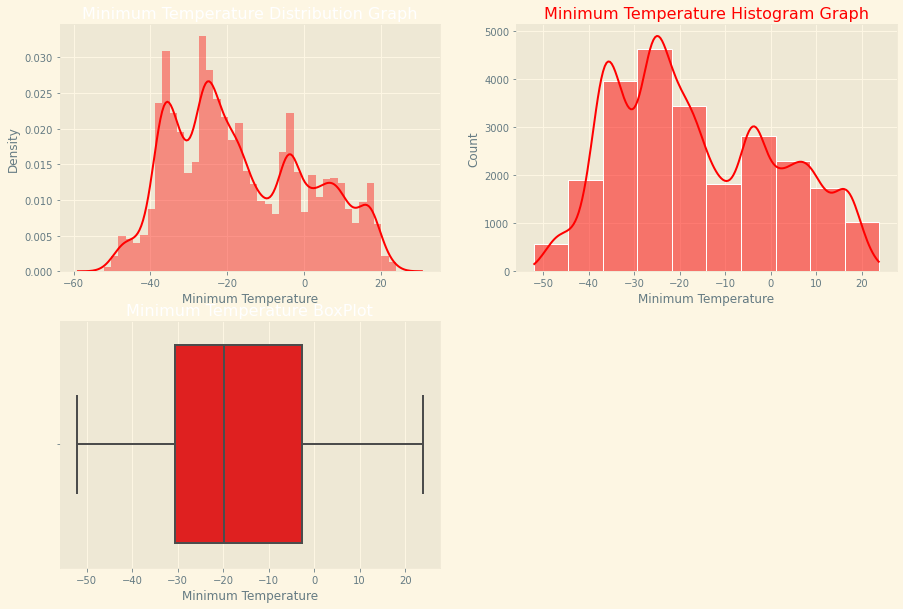

In [ ]:
plotGraph(df_lumpy,'Minimum Temperature')

Maximum Temperature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



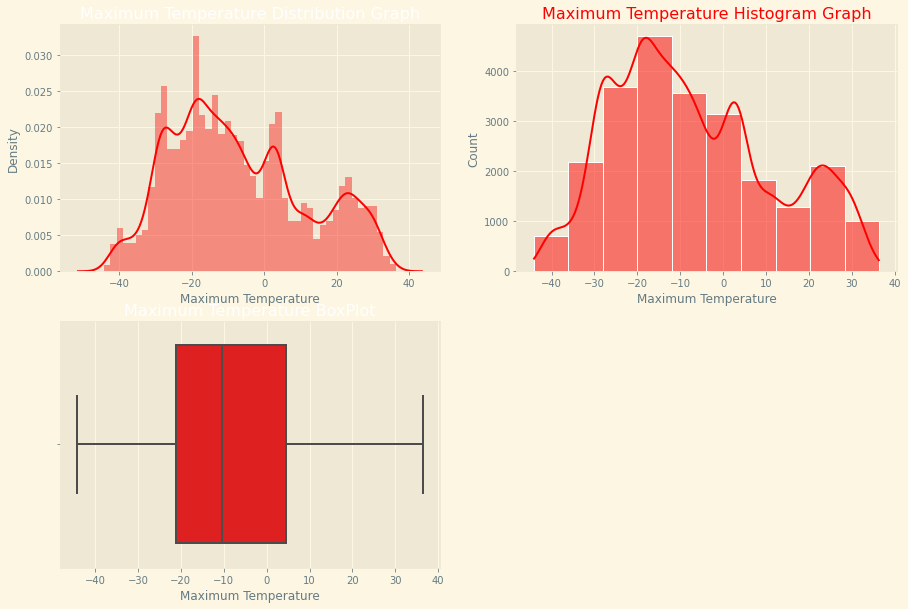

In [ ]:
plotGraph(df_lumpy,'Maximum Temperature')

Vapour Pressure

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



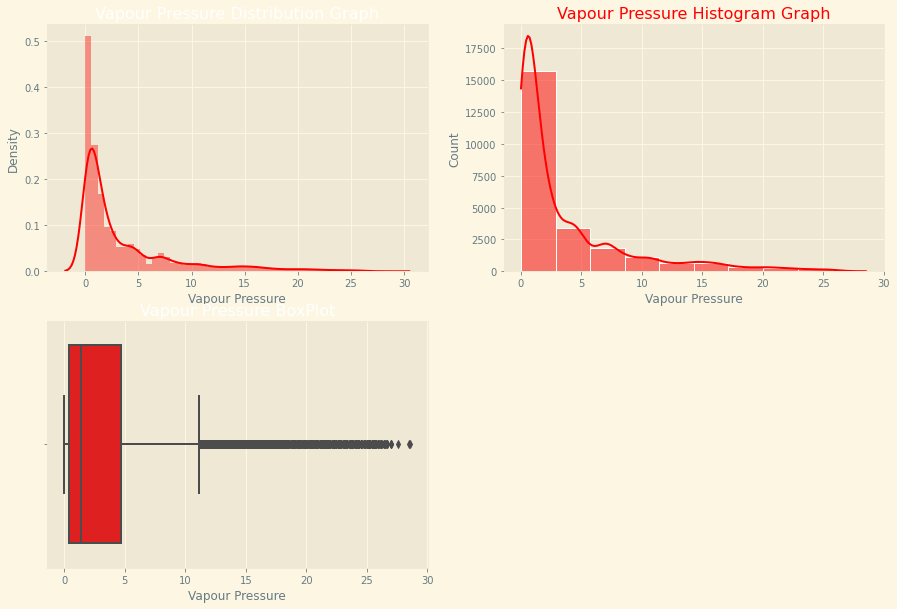

In [ ]:
plotGraph(df_lumpy,'Vapour Pressure')

Wet Day Frequency

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



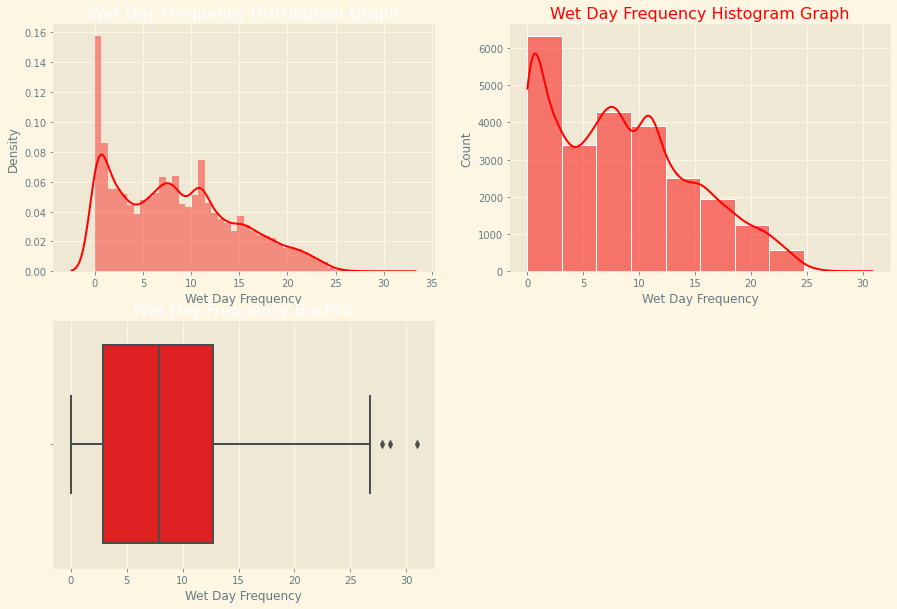

In [ ]:
plotGraph(df_lumpy,'Wet Day Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



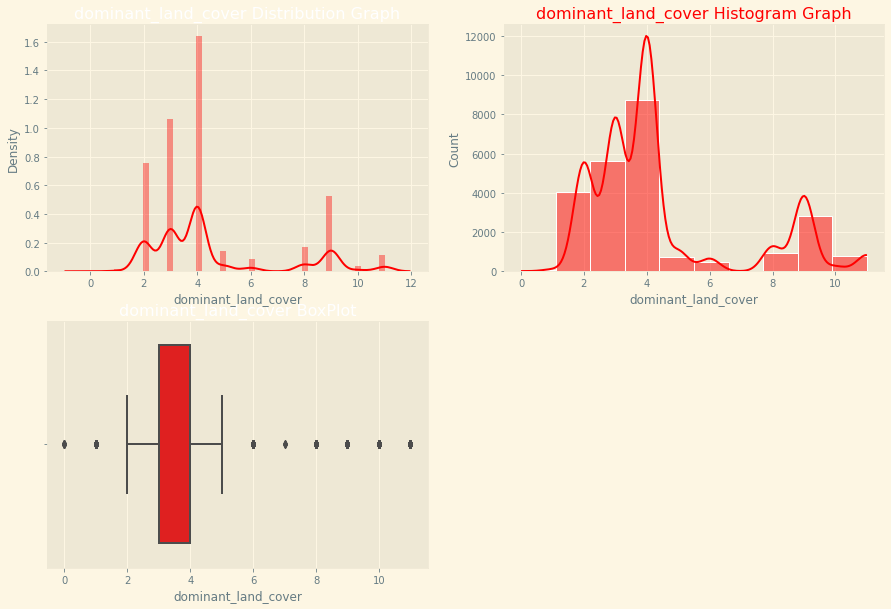

In [ ]:
plotGraph(df_lumpy,'dominant_land_cover')

###Bivariate Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



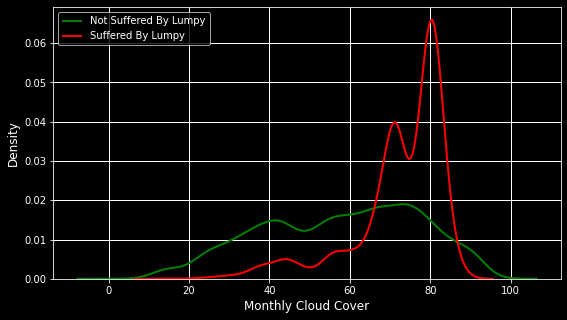

In [ ]:
plotChart(df_lumpy,'lumpy','Monthly Cloud Cover')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



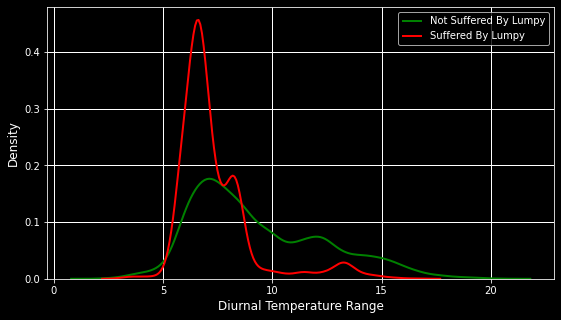

In [ ]:
plotChart(df_lumpy,'lumpy','Diurnal Temperature Range')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



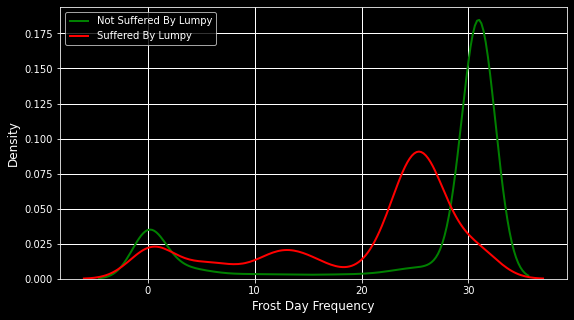

In [ ]:
plotChart(df_lumpy,'lumpy','Frost Day Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



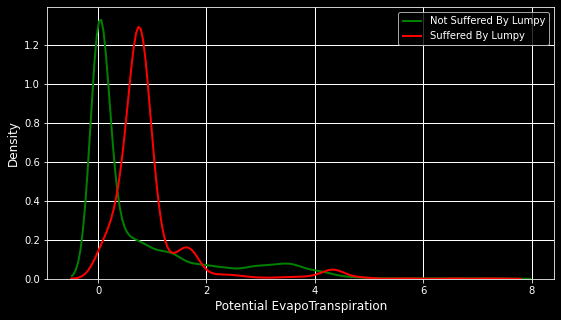

In [ ]:
plotChart(df_lumpy,'lumpy','Potential EvapoTranspiration')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



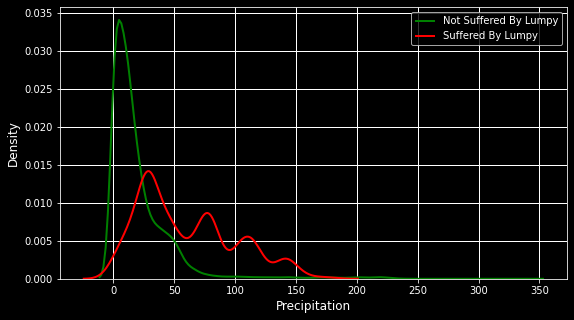

In [ ]:
plotChart(df_lumpy,'lumpy','Precipitation')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



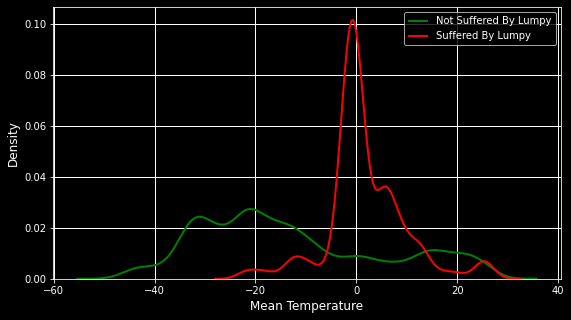

In [ ]:
plotChart(df_lumpy,'lumpy','Mean Temperature')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



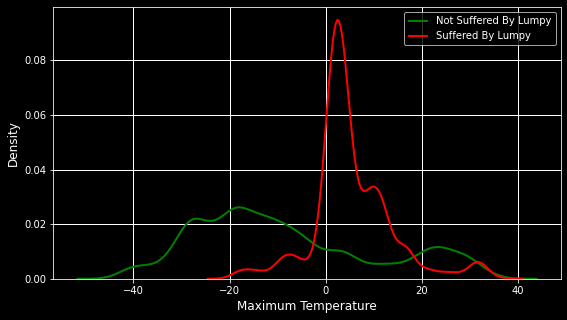

In [ ]:
plotChart(df_lumpy,'lumpy','Maximum Temperature')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



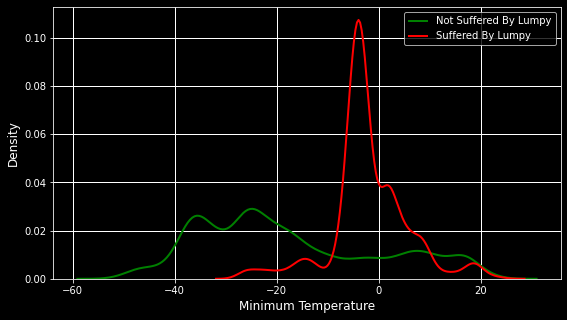

In [ ]:
plotChart(df_lumpy,'lumpy','Minimum Temperature')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



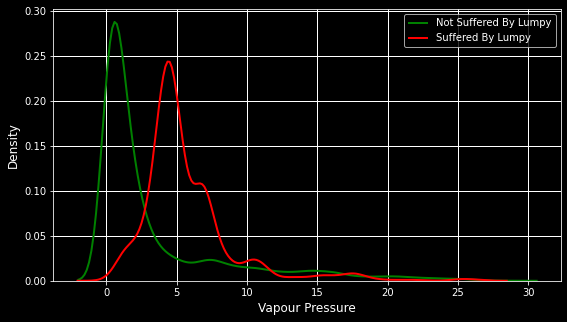

In [ ]:
plotChart(df_lumpy,'lumpy','Vapour Pressure')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



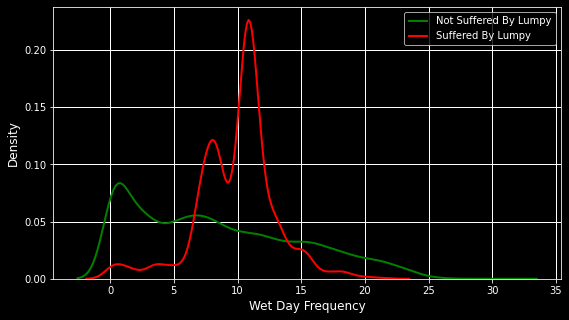

In [ ]:
plotChart(df_lumpy,'lumpy','Wet Day Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



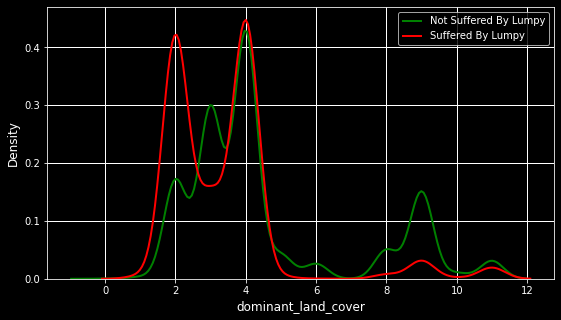

In [ ]:
plotChart(df_lumpy,'lumpy','dominant_land_cover')

###Correlation Analysis

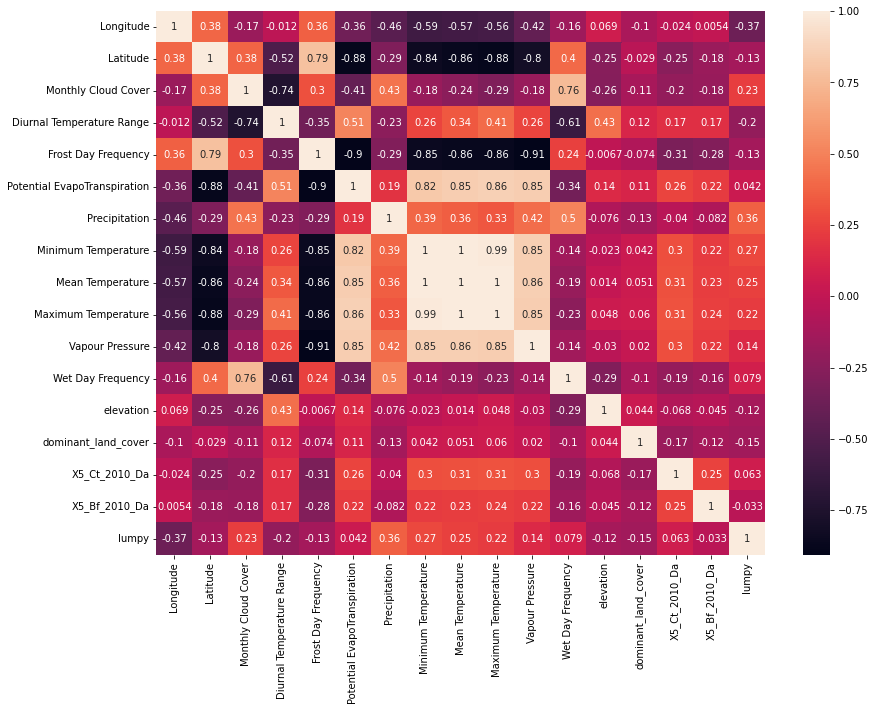

In [23]:
plt.figure(figsize=(30,10))
plt.subplot(121)
sns.heatmap(df_lumpy.corr(), annot=True)
plt.show()

#Model Training and Prediction

In [22]:
#Removing negatively correlated values
data = df_lumpy.drop(['region', 'country', 'reportingDate', 'Diurnal Temperature Range', 'Frost Day Frequency', 'elevation', 'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da'], axis=1)

In [23]:
data.head()

,Longitude,Latitude,Monthly Cloud Cover,Potential EvapoTranspiration,Precipitation,Minimum Temperature,Mean Temperature,Maximum Temperature,Vapour Pressure,Wet Day Frequency,lumpy
0,90.380931,22.437184,41.6,2.3,1.7,12.7,19.1,25.5,15.7,0.00,1
1,87.854975,22.986757,40.5,2.4,0.0,13.2,19.8,26.5,16.3,0.00,1
2,85.279935,23.610181,27.3,2.3,0.6,9.4,16.2,23.0,13.0,0.98,1
3,81.564510,43.882221,45.3,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,1
4,81.161057,43.834976,38.8,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,1


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaler.transform(data)

array([[ 0.22984905, -1.24650751, -0.90293962, ...,  2.43162296,
        -1.3570506 ,  2.99210534],
       [ 0.1711986 , -1.21814386, -0.95934516, ...,  2.55264834,
        -1.3570506 ,  2.99210534],
       [ 0.11140845, -1.18596875, -1.63621163, ...,  1.88700877,
        -1.20014318,  2.99210534],
       ...,
       [-1.37530977, -3.26897094,  0.49181552, ...,  4.08563642,
         1.18388889, -0.33421283],
       [-1.36370022, -3.26897094,  0.49181552, ...,  4.14614911,
         1.25273603, -0.33421283],
       [-1.35209066, -3.26897094,  0.42515443, ...,  4.20666179,
         1.31197658, -0.33421283]])

In [25]:
X = data.iloc[:, :-1]

In [26]:
y = data.iloc[:, -1]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
print("X_Train = ", x_train.shape)
print("X_Test = ", x_test.shape)
print("y_train = ", y_train.shape)
print("y_test = ", y_test.shape)

X_Train =  (16936, 10)
X_Test =  (7259, 10)
y_train =  (16936,)
y_test =  (7259,)


###Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))
#print("Accuracy: ", model.accuracy_score(y_test, results))

MSE:  0.2474788233989367
R-Squared Error:  0.3128349153633905
Training Score:  0.3322535915027205
Testing Score:  0.3128349153633905


###Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(x_train, y_train)

Ridge()

In [32]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))
#print("Accuracy: ", model.accuracy_score(y_test, results))

MSE:  0.2474627979258982
R-Squared Error:  0.3129239071311729
Training Score:  0.33218431006042515
Testing Score:  0.3129239071311729


###Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.001)
model.fit(x_train, y_train)

Lasso(alpha=0.001)

In [34]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))
#print("Accuracy: ", model.accuracy_score(y_test, results))

MSE:  0.24803536904056603
R-Squared Error:  0.3097407616610174
Training Score:  0.32810235221350414
Testing Score:  0.3097407616610174


###ElasticNet Regression


In [35]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.0001, max_iter=10000)
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+02, tolerance: 1.540e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet(alpha=0.0001, max_iter=10000)

In [36]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))
#print("Accuracy: ", model.accuracy_score(y_test, results))

MSE:  0.2479915221504674
R-Squared Error:  0.30998478368047344
Training Score:  0.32834284523700374
Testing Score:  0.30998478368047344


###Artificial Neural Network

In [37]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [38]:
hidden_units1 = 314
hidden_units2 = 256
hidden_units3 = 128

def ann_model():
  model = Sequential([
    Dense(hidden_units1, activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, activation='relu'),
    Dense(1, activation='sigmoid')
  ])
  return model

model = ann_model()

In [39]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss = msle, 
    optimizer = 'adam', 
    metrics=[msle, 'accuracy']
)
# train the model
history = model.fit(
    x_train.values, 
    y_train.values, 
    epochs=10, 
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
424/424 [==============================] - 4s 6ms/step - loss: 0.0499 - mean_squared_logarithmic_error: 0.0499 - accuracy: 0.8960 - val_loss: 0.0441 - val_mean_squared_logarithmic_error: 0.0441 - val_accuracy: 0.9082
Epoch 2/10
424/424 [==============================] - 2s 5ms/step - loss: 0.0497 - mean_squared_logarithmic_error: 0.0498 - accuracy: 0.8965 - val_loss: 0.0441 - val_mean_squared_logarithmic_error: 0.0441 - val_accuracy: 0.9082
Epoch 3/10
424/424 [==============================] - 2s 5ms/step - loss: 0.0497 - mean_squared_logarithmic_error: 0.0497 - accuracy: 0.8965 - val_loss: 0.0441 - val_mean_squared_logarithmic_error: 0.0441 - val_accuracy: 0.9082
Epoch 4/10
424/424 [==============================] - 3s 6ms/step - loss: 0.0497 - mean_squared_logarithmic_error: 0.0497 - accuracy: 0.8965 - val_loss: 0.0441 - val_mean_squared_logarithmic_error: 0.0441 - val_accuracy: 0.9082
Epoch 5/10
424/424 [==============================] - 2s 5ms/step - loss: 0.0497 - mean_

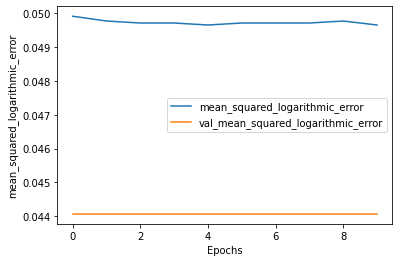

In [40]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

plot_history(history, 'mean_squared_logarithmic_error')

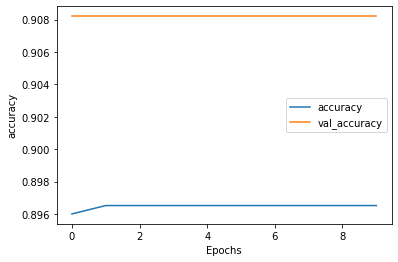

In [41]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

plot_history(history, 'accuracy')

In [42]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Testing Accuracy: ", model.evaluate(x_test, y_test))

#print("Score: ", model.score(x_test, y_test))
#print("Accuracy: ", model.accuracy_score(y_test, results))

227/227 [==============================] - 1s 2ms/step
MSE:  0.31450229859084616
R-Squared Error:  -0.10976914837032203
227/227 [==============================] - 1s 2ms/step - loss: 0.0475 - mean_squared_logarithmic_error: 0.0475 - accuracy: 0.9011
Testing Accuracy:  [0.04752239212393761, 0.047501932829618454, 0.901088297367096]


###Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100) 
model.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))

MSE:  0.16263432673328185
R-Squared Error:  0.7032372193564569
Training Score:  1.0
Testing Score:  0.9735500757680121


###K Nearest Neighbours

In [45]:
from sklearn.neighbors import KNeighborsClassifier
K = []
training = []
test = []
loss = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    results = clf.predict(x_test)
    model_loss = np.sqrt(mean_squared_error(y_test,results))
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    loss.append(model_loss)
    scores[k] = [training_score, test_score, model_loss]

In [46]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9835262163438828, 0.9619782339165174, 0.19499170773005342]
3 : [0.9802196504487483, 0.9667998346879736, 0.18220912521612756]
4 : [0.978330184222957, 0.9685907149745144, 0.17722664874528773]
5 : [0.976027397260274, 0.9677641548422647, 0.17954343529557193]
6 : [0.9756731223429381, 0.96735087477614, 0.1806906893668294]
7 : [0.9747874350495985, 0.9669375947100152, 0.18183070502526477]
8 : [0.9746102975909305, 0.9658355145336823, 0.1848363748462885]
9 : [0.9731931979215872, 0.9662487945998072, 0.1837150113632331]
10 : [0.9731341521020311, 0.9658355145336823, 0.1848363748462885]
11 : [0.9723075106282475, 0.9662487945998072, 0.1837150113632331]
12 : [0.9715989607935758, 0.9663865546218487, 0.18333969940564226]
13 : [0.9712446858762399, 0.9665243146438903, 0.1829636175749421]
14 : [0.9717760982522438, 0.9666620746659319, 0.18258676111391006]
15 : [0.9712446858762399, 0.9659732745557239, 0.18446334444619633]
16 : [0.9709494567784601, 0.9658355145336823, 0.1848363748462885]
17 : [0.970181

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


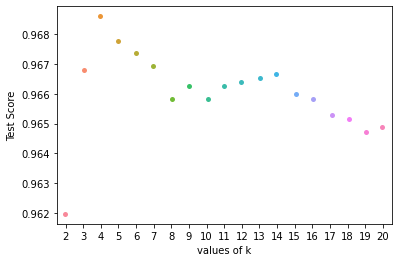

In [47]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()
#preferred value of k = 7

###Support Vector Machine (SVM)

In [48]:
from sklearn import svm
model = svm.SVC(kernel='linear') # Linear Kernel
model.fit(x_train, y_train)

SVC(kernel='linear')

In [49]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))

MSE:  0.2311944820970911
R-Squared Error:  0.40029188078283995
Training Score:  0.9493386868209731
Testing Score:  0.9465491114478578


In [50]:
from sklearn import svm
model = svm.SVC(kernel='poly') # poly Kernel
model.fit(x_train, y_train)

SVC(kernel='poly')

In [51]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))

MSE:  0.22083262395472197
R-Squared Error:  0.4528436231884674
Training Score:  0.9554204062352385
Testing Score:  0.9512329521972723


In [52]:
from sklearn import svm
model = svm.SVC(kernel='rbf') # RBF Kernel
model.fit(x_train, y_train)

SVC()

In [53]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))

MSE:  0.21737453291558792
R-Squared Error:  0.46984565749617035
Training Score:  0.9573098724610297
Testing Score:  0.95274831243973


In [54]:
from sklearn import svm
model = svm.SVC(kernel='sigmoid') # Sigmoid Kernel
model.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [55]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))

MSE:  0.41778217760779557
R-Squared Error:  -0.9583252243508809
Training Score:  0.8147142182333491
Testing Score:  0.8254580520732884


###Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)

In [57]:
results = model.predict(x_test)
print("MSE: ", np.sqrt(mean_squared_error(y_test,results)))
print("R-Squared Error: ", r2_score(y_test, results))
print("Training Score: ", model.score(x_train, y_train))
print("Testing Score: ", model.score(x_test, y_test))

MSE:  0.16389998260558994
R-Squared Error:  0.6986003009089015
Training Score:  1.0
Testing Score:  0.9731367957018873
